Theory from https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

In [9]:
from matplotlib import pyplot
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Import the final dataset with test sets
with open("manual-annotations/multilingual-genre-annotated-test-set.json") as main_file:
	main_dict = json.load(main_file)

main_dict.keys()

dict_keys(['mt', 'el', 'tr', 'sq', 'is', 'uk', 'ca', 'mk', 'hr', 'sl'])

## Pearson Correlation

At the core of many statistical analyses is the concept of linear relationships between variables. This is a relationship that is consistently additive across the two data samples.

This relationship can be summarized between two variables, called the covariance. It is calculated as the average of the product between the values from each sample, where the values have been centred (by subtracting their respective means).

The calculation of the sample covariance is as follows:

cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

A problem with covariance as a statistical tool alone is that it is challenging to interpret. This leads us to Pearson’s correlation coefficient next.

Named after Karl Pearson, The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.

Pearson’s correlation coefficient is calculated by dividing the covariance of the two variables by the product of their respective standard deviations. It is the normalization of the covariance between the two variables to give an interpretable score.

Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
The use of mean and standard deviation in the calculation suggests the need for the two data samples to have a Gaussian or Gaussian-like distribution.

The result of the calculation, the correlation coefficient can be interpreted to understand the relationship.

The coefficient returns a value between -1 and 1, symbolizing the full spectrum of correlation: from a complete negative correlation to a total positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

Pearson’s correlation coefficient can be used to evaluate the relationship between more than two variables.

This can be done by calculating a matrix of the relationships between each pair of variables in the dataset. The result is a symmetric matrix called a correlation matrix with a value of 1.0 along the diagonal as each column always perfectly correlates with itself.

In [29]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
def pearson(macro_F1, factor):
	corr, p = pearsonr(macro_F1, factor)
	print('Pearsons correlation: %.3f' % corr)
	print(f"p-value: {p}")

## Spearman's Correlation

While many data relationships can be linear, some may be nonlinear. These nonlinear relationships are stronger or weaker across the distribution of the variables. Further, the two variables being considered may have a non-Gaussian distribution.

Named after Charles Spearman, Spearman’s correlation coefficient can be used to summarize the strength between the two data samples. This test of relationship can also be used if there is a linear relationship between the variables but will have slightly less power (e.g. may result in lower coefficient scores).

As with the Pearson correlation coefficient, the scores are between -1 and 1 for perfectly negatively correlated variables and perfectly positively correlated respectively.

Instead of directly working with the data samples, it operates on the relative ranks of data values. This is a common approach used in non-parametric statistics, e.g. statistical methods where we do not assume a distribution of the data such as Gaussian.

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))
A linear relationship between the variables is not assumed, although a monotonic relationship is assumed. This is a mathematical name for an increasing or decreasing relationship between the two variables.

If you are unsure of the distribution and possible relationships between two variables, the Spearman correlation coefficient is a good tool to use.

As with the Pearson’s correlation coefficient, the coefficient can be calculated pair-wise for each variable in a dataset to give a correlation matrix for review.

In [30]:
from scipy.stats import spearmanr

# calculate spearman's correlation
def spearman(macro_F1, factor):
	corr, p = spearmanr(macro_F1, factor)
	print('Spearmans correlation: %.3f' % corr)
	print(f"p-value: {p}")

## Sizes in pretraining data

In [23]:
# Add information on sizes in XLM-RoBERTa training set - for specific language and combined with very closely related language. Sizes are in M of tokens.
sizes = {
	"mt": 0,
	"el": 4285, 
	"tr": 2736,
	"sq": 918,
	"is": 505,
	"uk": 6500,
	"ca": 1752,
	"mk": 449,
	"hr": 3297 + 14 + 843, #added Bosnian, Serbian (in that order), 
	"sl": 1669,}

sizes_with_related = {
	"mt": 0 + 2869, # Central Semitic Arabic languages (Afro-Asiatic language family): Maltese, Arabic
	"el": 4285, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"tr": 2736 + 783,
	"sq": 918, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"is": 505 + 7823 + 8494 + 778, # North Germanic languages: Icelandic, Danish, Norwegian, Swedish
	"uk": 6500 + 362 + 23408, # East Slavic: Ukrainian, Belarusian, Russian
	"ca": 1752 + 9374 + 495 + 8405, # Ibero-Romance: Catalan, Spanish, Galician, Portuguese
	"mk": 449 + 5487, # Eastern South Slavic: Macedonian, Bulgarian 
	"hr": 3297 + 1669 + 14 + 843, # Western South Slavic languages: Croatian, Slovenian, Bosnian, Serbian (in that order)
	"sl": 1669 + 3297 + 14 + 843 # Western South Slavic languages: Slovenian, Croatian, Bosnian, Serbian (in that order)
	}

In [24]:
# Sizes in GB, from https://aclanthology.org/2020.acl-main.747.pdf

sizes_mb = {
	"mt": 0,
	"el": 46.9,
	"tr": 20.9,
	"sq": 5.4,
	"is": 3.2,
	"uk": 84.6,
	"ca": 10.1,
	"mk": 4.8,
	"hr": 20.5 +0.1 + 9.1, #added Bosnian, Serbian (in that order), 
	"sl": 10.3,
	}

sizes_mb_with_related = {
	"mt": 0 + 28.0, # Central Semitic Arabic languages (Afro-Asiatic language family): Maltese, Arabic
	"el": 46.9, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"tr": 20.9 + 6.5, # Southern Turkic (Turkic language family): Turkish, Azerbaijani
	"sq": 5.4, # is a separate branch of Indo-European language family and has no direct descendants that could be added
	"is": 3.2 + 45.6 + 49.0 + 12.1, # North Germanic languages: Icelandic, Danish, Norwegian, Swedish
	"uk": 84.6 + 4.3 + 278.0, #East Slavic: Ukrainian, Belarusian, Russian
	"ca": 10.1 + 53.3 + 2.9 + 49.1, # Ibero-Romance: Catalan, Spanish, Galician, Portuguese
	"mk": 4.8 + 57.5, # Eastern South Slavic: Macedonian, Bulgarian
	"hr": 20.5 + 0.1 + 9.1 + 10.3, # Western South Slavic languages: Croatian, Bosnian, Serbian, Slovenian (in that order)
	"sl": 10.3 + 20.5 + 0.1 + 9.1 # Western South Slavic languages: Slovenian, Croatian, Bosnian, Serbian (in that order)
	}

In [25]:
sizes_list = list(sizes.values())
sizes_related_list = list(sizes_with_related.values())
sizes_mb_list = list(sizes_mb.values())
sizes_mb_related_list = list(sizes_mb_with_related.values())

sizes_mb_related_list

[28.0, 46.9, 27.4, 5.4, 109.9, 366.9, 115.4, 62.3, 40.0, 40.0]

In [27]:
# Normalize the values using the min-max normalization
# Min-max is a scaling technique where values are rescaled and shifted so that they range between 0 and 1 or between -1 and 1.

def normalize(list):
	data = np.array(list).reshape(-1, 1)
	scaler = MinMaxScaler()
	scaler.fit(data)
	norm_list = scaler.transform(data)

	return norm_list

sizes_list_norm = normalize(sizes_list)
sizes_related_list_norm = normalize(sizes_related_list)
sizes_mb_list_norm = normalize(sizes_mb_list)
sizes_mb_related_list_norm = normalize(sizes_mb_related_list)

print(sizes_mb_related_list_norm)

[[0.06251729]
 [0.11479945]
 [0.06085754]
 [0.        ]
 [0.28907331]
 [1.        ]
 [0.30428769]
 [0.15739972]
 [0.09571231]
 [0.09571231]]


In [18]:
# Get an array of macro F1 values
macro_F1 = [main_dict[x]["macro_f1"] for x in list(main_dict.keys())]
macro_F1

[0.552356688788473,
 0.8435600870783095,
 0.8990631100925218,
 0.866280284043442,
 0.8104437496515837,
 0.9483272575377839,
 0.8271009954845262,
 0.9226380344801398,
 0.882915766854554,
 0.935625159154571]

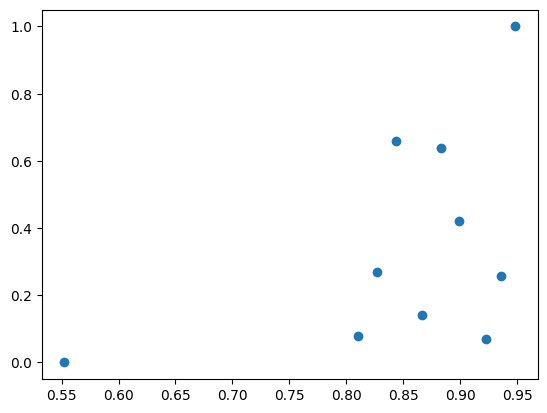

In [19]:
# Show the values on a scatter plot
# Normalized sizes (M of tokens)
pyplot.scatter(macro_F1, sizes_list_norm)
pyplot.show()

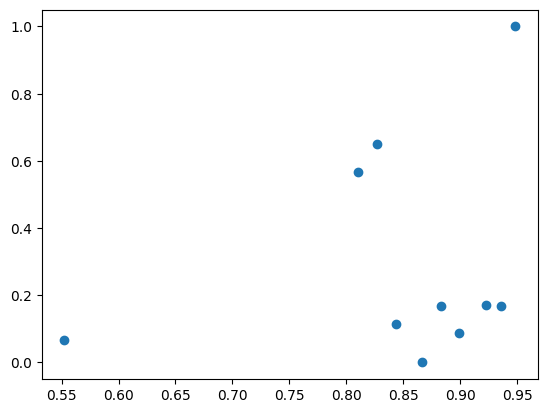

In [20]:
# Show the values on a scatter plot
# Normalized sizes (M of tokens) with related languages
pyplot.scatter(macro_F1, sizes_related_list_norm)
pyplot.show()

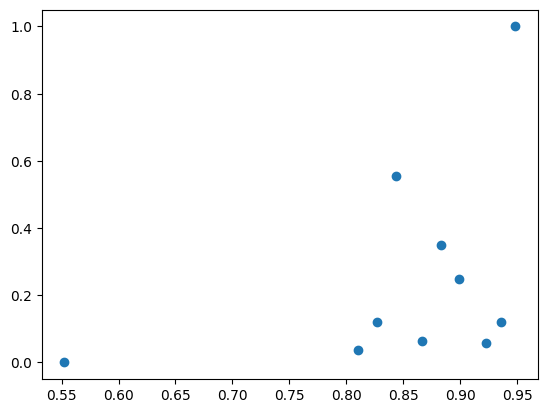

In [21]:
# Show the values on a scatter plot
# Normalized sizes (GB)
pyplot.scatter(macro_F1, sizes_mb_list_norm)
pyplot.show()

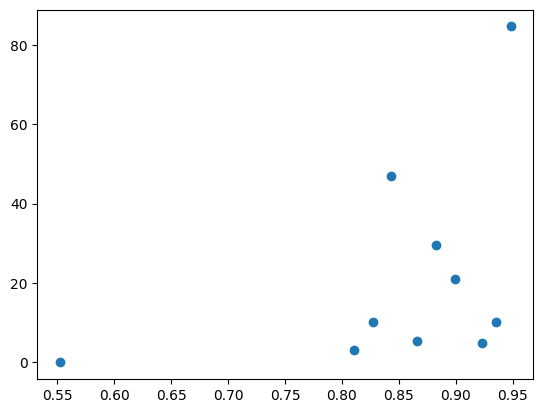

In [41]:
# Show the values on a scatter plot
# Normalized sizes (GB)
pyplot.scatter(macro_F1, sizes_mb_list)
pyplot.show()

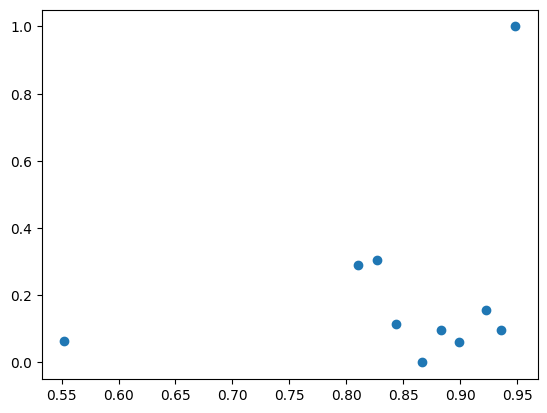

In [28]:
# Show the values on a scatter plot
# Normalized sizes (GB) with related languages
pyplot.scatter(macro_F1, sizes_mb_related_list_norm)
pyplot.show()

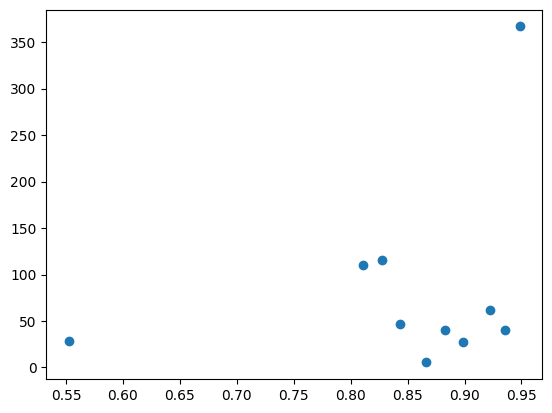

In [42]:
# Show the values on a scatter plot
# Normalized sizes (GB) with related languages
pyplot.scatter(macro_F1, sizes_mb_related_list)
pyplot.show()

In [45]:
# Calculate correlation
for i in [sizes_list,sizes_related_list, sizes_mb_list, sizes_mb_related_list]:
	pearson(macro_F1, i)
	spearman(macro_F1, i)
	print("\n")

Pearsons correlation: 0.483
p-value: 0.15770106280572002
Spearmans correlation: 0.442
p-value: 0.20042268671194224


Pearsons correlation: 0.240
p-value: 0.5035757809014645
Spearmans correlation: 0.280
p-value: 0.433925839676929


Pearsons correlation: 0.415
p-value: 0.23343624750296876
Spearmans correlation: 0.588
p-value: 0.07387770688865801


Pearsons correlation: 0.298
p-value: 0.40378781012771897
Spearmans correlation: 0.122
p-value: 0.7379379712336098




### Label-level correlation

In [46]:
# Calculate label-level performance for each label, each dataset

main_dict.keys()

dict_keys(['mt', 'el', 'tr', 'sq', 'is', 'uk', 'ca', 'mk', 'hr', 'sl'])

# Token Overlap

In [23]:
main_dict["sl"]['token_overlap']['overlap_percentage']

0.9742887570363609

In [24]:
# Get an array of overlap percentage
overlap = [main_dict[x]['token_overlap']['overlap_percentage'] for x in list(main_dict.keys())]
overlap

[0.8170850409836066,
 0.16142765685019206,
 0.5215024680505781,
 0.605775337143711,
 0.5175752260153825,
 0.15667519020109227,
 0.7448809178042405,
 0.14598936285683273,
 0.8215173660815188,
 0.9742887570363609]

In [ ]:
# Show the values on a scatter plot
# plot
pyplot.scatter(macro_F1, overlap)
pyplot.show()